DL Project 1. Breast Cancer Classification with Neural Network

Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers

Loading dataset

In [ ]:
dataset = pd.read_csv('/content/data.csv')

In [ ]:
print(dataset)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
# loading the data to a data frame
data_frame = pd.DataFrame(dataset)

In [ ]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data_frame = data_frame.drop(['Unnamed: 32'], axis=1)

In [ ]:
data_frame.drop(columns='id', axis=1, inplace=True)

In [ ]:
# Numbers of rows and column
data_frame.shape

(569, 31)

In [ ]:
data_frame.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# checking for missing values
data_frame.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
-data_frame.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,-569.000000,-569.000000,-569.000000,-569.000000,-569.000000,-569.000000,-569.000000,-569.000000,-569.000000,-569.000000,...,-569.000000,-569.000000,-569.000000,-569.000000,-569.000000,-569.000000,-569.000000,-569.000000,-569.000000,-569.000000
mean,-14.127292,-19.289649,-91.969033,-654.889104,-0.096360,-0.104341,-0.088799,-0.048919,-0.181162,-0.062798,...,-16.269190,-25.677223,-107.261213,-880.583128,-0.132369,-0.254265,-0.272188,-0.114606,-0.290076,-0.083946
std,-3.524049,-4.301036,-24.298981,-351.914129,-0.014064,-0.052813,-0.079720,-0.038803,-0.027414,-0.007060,...,-4.833242,-6.146258,-33.602542,-569.356993,-0.022832,-0.157336,-0.208624,-0.065732,-0.061867,-0.018061
min,-6.981000,-9.710000,-43.790000,-143.500000,-0.052630,-0.019380,-0.000000,-0.000000,-0.106000,-0.049960,...,-7.930000,-12.020000,-50.410000,-185.200000,-0.071170,-0.027290,-0.000000,-0.000000,-0.156500,-0.055040
25%,-11.700000,-16.170000,-75.170000,-420.300000,-0.086370,-0.064920,-0.029560,-0.020310,-0.161900,-0.057700,...,-13.010000,-21.080000,-84.110000,-515.300000,-0.116600,-0.147200,-0.114500,-0.064930,-0.250400,-0.071460
50%,-13.370000,-18.840000,-86.240000,-551.100000,-0.095870,-0.092630,-0.061540,-0.033500,-0.179200,-0.061540,...,-14.970000,-25.410000,-97.660000,-686.500000,-0.131300,-0.211900,-0.226700,-0.099930,-0.282200,-0.080040
75%,-15.780000,-21.800000,-104.100000,-782.700000,-0.105300,-0.130400,-0.130700,-0.074000,-0.195700,-0.066120,...,-18.790000,-29.720000,-125.400000,-1084.000000,-0.146000,-0.339100,-0.382900,-0.161400,-0.317900,-0.092080
max,-28.110000,-39.280000,-188.500000,-2501.000000,-0.163400,-0.345400,-0.426800,-0.201200,-0.304000,-0.097440,...,-36.040000,-49.540000,-251.200000,-4254.000000,-0.222600,-1.058000,-1.252000,-0.291000,-0.663800,-0.207500


Label Encoding

Benign -> 0

Malignant -> 1

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data_frame['diagnosis'])
data_frame['target'] = labels
data_frame.drop(columns='diagnosis', axis=1, inplace = True)

In [ ]:
data_frame.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
# Distribution of target variables
data_frame['target'].value_counts()

,count
target,
0,357
1,212


<Axes: xlabel='target', ylabel='count'>

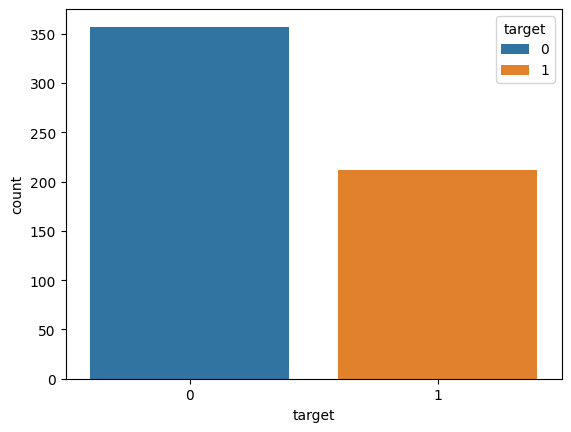

In [ ]:
sns.countplot(x= 'target', data = data_frame,  hue="target")

In [ ]:
data_frame.groupby('target').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


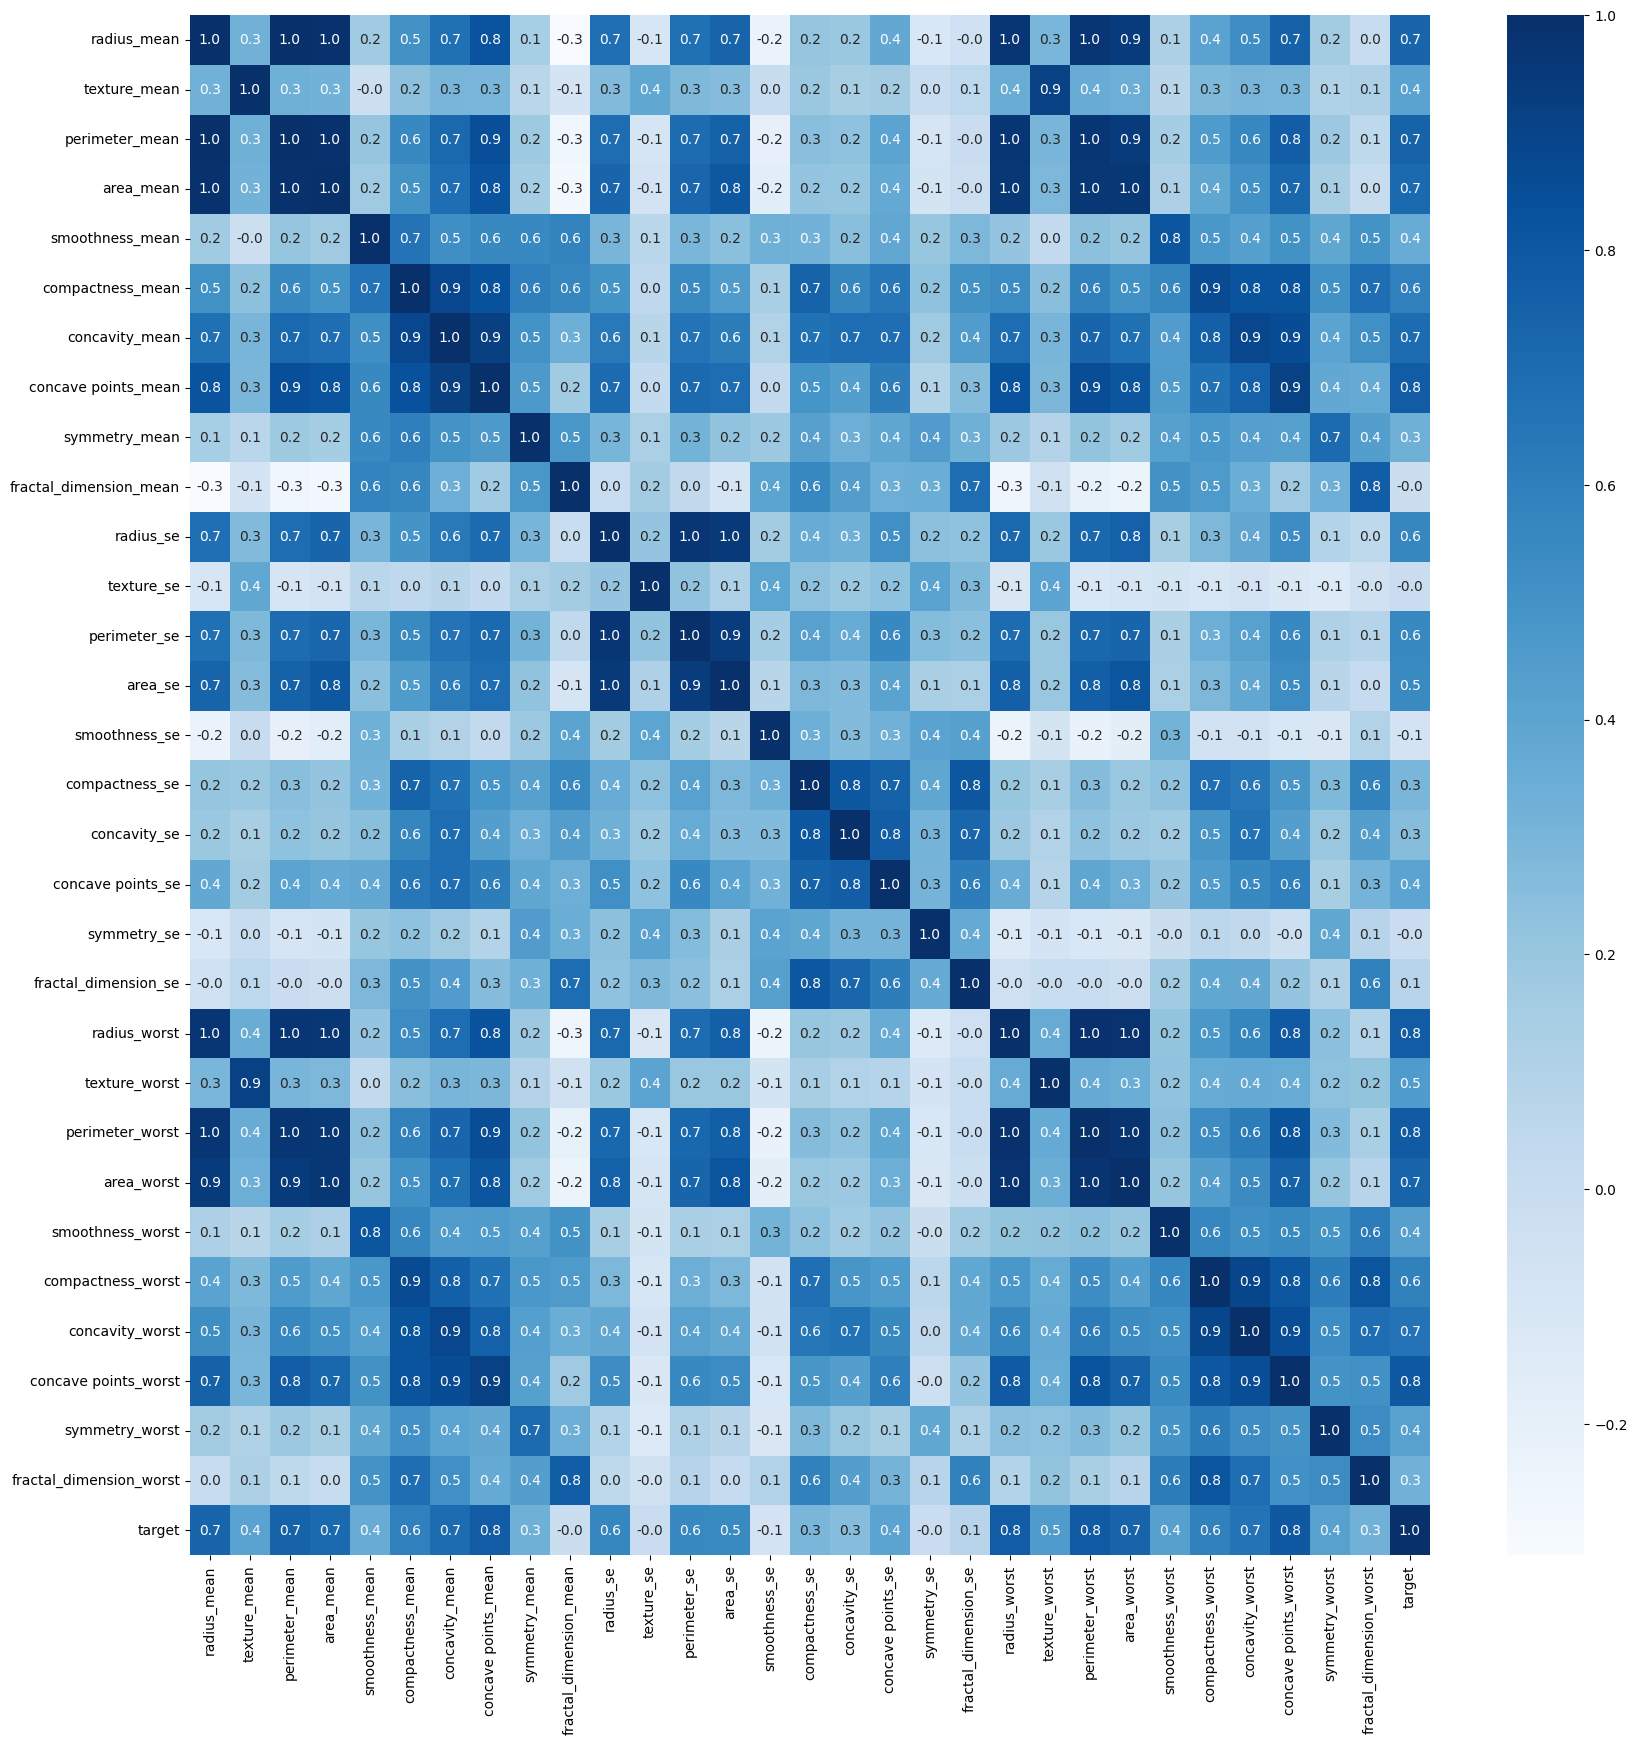

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_frame.corr(), cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

In [ ]:
X = data_frame.drop(columns='target', axis=1)
Y = data_frame['target']

In [ ]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64


Splitting data into train and test dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (398, 30) (171, 30)


Standardizing the data

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

**Building a Neural Network**

In [ ]:
# Setting layers of Neural Network
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape = (30,)),
        keras.layers.Dense(20,activation = 'relu'),
        keras.layers.Dense(2, activation = 'sigmoid')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling a neural network
compile = model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Training a neural network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs = 10)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3622 - loss: 1.0860 - val_accuracy: 0.4750 - val_loss: 0.8638
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5224 - loss: 0.7676 - val_accuracy: 0.7000 - val_loss: 0.6187
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6952 - loss: 0.5594 - val_accuracy: 0.8000 - val_loss: 0.4683
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7992 - loss: 0.4288 - val_accuracy: 0.8000 - val_loss: 0.3747
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8638 - loss: 0.3448 - val_accuracy: 0.8750 - val_loss: 0.3141
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8942 - loss: 0.2879 - val_accuracy: 0.9000 - val_loss: 0.2726
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9059 - loss: 0.2480 - val_accuracy: 0.9500 - val_loss: 0.2419
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9252 - loss: 0.2191 - val_accuracy: 0.9500 - val_lo

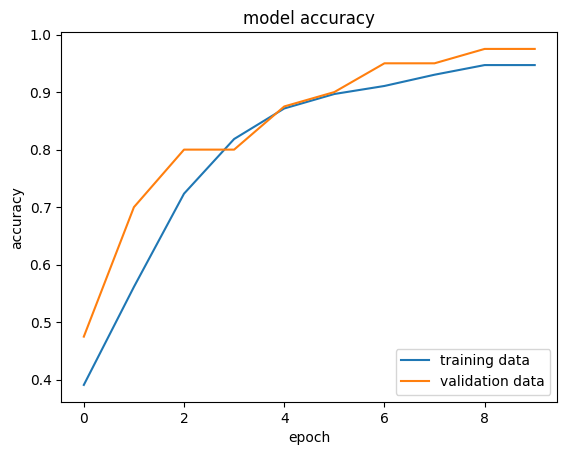

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

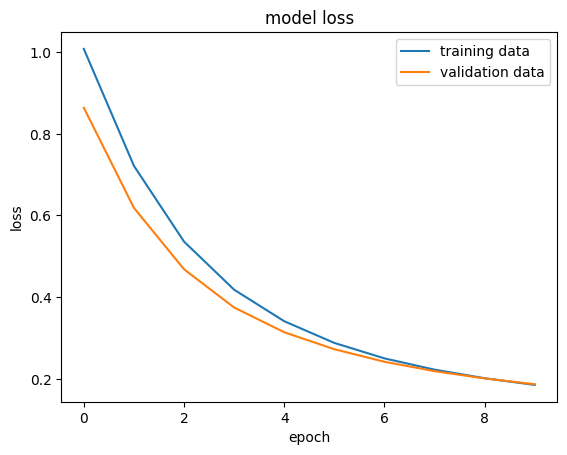

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
# Predicting accuracy of model on test data
loss, accuracy = model.evaluate(X_test_std, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy * 100)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9582 - loss: 0.1566 
Test Loss: 0.1572706401348114
Test Accuracy: 95.90643048286438


In [ ]:
Y_pred = model.predict(X_test_std)
print(Y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[0.61575973 0.42843038]
 [0.23121454 0.9919989 ]
 [0.30961332 0.8008629 ]
 [0.6786435  0.45526338]
 [0.7862951  0.35237136]
 [0.15113859 0.99959975]
 [0.05686568 0.9996632 ]
 [0.4078867  0.94470406]
 [0.74328    0.6944258 ]
 [0.84593976 0.11913508]
 [0.75171685 0.30448136]
 [0.40258706 0.91034156]
 [0.766676   0.17678256]
 [0.5110209  0.8481099 ]
 [0.8350649  0.09438144]
 [0.5457755  0.99242824]
 [0.77828145 0.10356802]
 [0.84268016 0.09872294]
 [0.90571696 0.15623088]
 [0.12775311 0.99674135]
 [0.638054   0.43018672]
 [0.7159043  0.23612458]
 [0.09330351 0.99848425]
 [0.90237075 0.10197387]
 [0.8069749  0.18145923]
 [0.7489687  0.36159626]
 [0.7467674  0.15936504]
 [0.64343476 0.38780004]
 [0.7593495  0.20322415]
 [0.32531363 0.97808033]
 [0.78130776 0.4430246 ]
 [0.82712203 0.09669545]
 [0.84231657 0.2277068 ]
 [0.8047266  0.140616  ]
 [0.8088496  0.23012546]
 [0.78167737 0.13745183]
 [0.570742   0.5685573 ]
 [0.9036335  0.14899208]
 [0.31813225

In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]


In [ ]:
input_data = (16.25,19.51,109.8,815.8,0.1026,0.1893,0.2236,0.09194,0.2151,0.06578,0.3147,0.9857,3.07,33.12,0.009197,0.0547,0.08079,0.02215,0.02773,0.006355,17.39,23.05,122.1,939.7,0.1377,0.4462,0.5897,0.1775,0.3318,0.09136)

# Change the input data into numpy array
input_data_as_array = np.asarray(input_data)

# Reshaping the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_array.reshape(1,-1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if prediction_label[0] == 0:
  print('The breast cancer is Benign')
else:
  print('The breast cancer is Malignant')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[ 0.58729953  0.08335656  0.72318198  0.43533177  0.48281777  1.68145557
   1.7434052   1.15495385  1.29640274  0.43044816 -0.31055713 -0.42014454
   0.09221043 -0.15315432  0.68909029  1.63271498  1.6167497   1.64213348
   0.91898247  0.96847266  0.23002859 -0.40857787  0.44598775  0.10148783
   0.2578024   1.32794769  1.63968739  0.99774217  0.69891407  0.4471109 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[0.743971  0.9368574]]
[1]
The breast cancer is Malignant
